### 1. Solve the given linear programming problem

M ax Z = 5x1 − 2x2 + 3x3

Subject to, 2x1 + 2x2 − x3 ≥ 2

3x1 − 4x2 ≤ 3

x2 + 3x3 ≤ 5

x1, x2, x3 ≥ 0

In [1]:
import numpy as np

In [2]:
import scipy.optimize

In [3]:
from scipy.optimize import linprog

In [4]:
c=[-5,2,-3]

In [18]:
a=[[-2,-2,1],[3,-4,0],[0,1,3]]

In [19]:
b=[-2,3,5]

In [20]:
x1_bounds = (0,None)

In [21]:
x2_bounds = (0,None)

In [22]:
x3_bounds = (0,None)

In [23]:
res = linprog(c, a, b, bounds=(x1_bounds,x2_bounds,x3_bounds),options={"disp":True})

Optimization terminated successfully.
         Current function value: -28.333333  
         Iterations: 4


In [27]:
true_res=res.fun

In [28]:
print(true_res)

-28.33333333333338


2.### Ackley function is defined as
f(x, y) = −20e

−0.2

√

0.5(x2+y2) − e

0.5(cos(2πx)+cos(2πy)) + e + 20

where e is the irrational number having value in between 2.71 and 2.72.

Plot the function

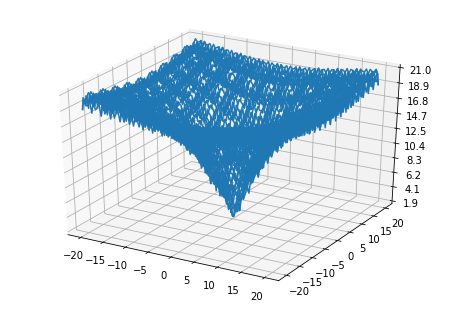

NameError: name 'permutation' is not defined

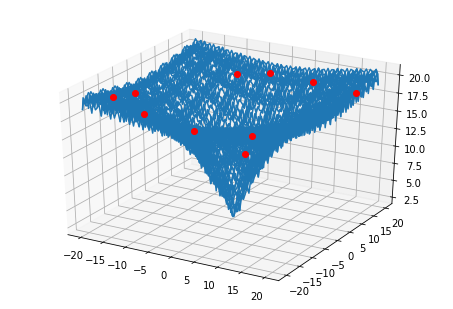

In [30]:
#!/usr/bin/env python
 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
 
#http://www.sfu.ca/~ssurjano/ackley.html
def ackley(x1,x2):
    a = 20
    b = 0.2
    c = 2*np.pi
     
    sum1 = x1**2 + x2**2
    sum2 = np.cos(c*x1) + np.cos(c*x2)
     
    term1 = - a * np.exp(-b * ((1/2.) * sum1**(0.5)))
    term2 = - np.exp((1/2.)*sum2)
 
    return term1 + term2 + a + np.exp(1)
 
plotN = 100
x1 = np.linspace(-20, 20, plotN)
x2 = np.linspace(-20, 20, plotN)
 
x1, x2 = np.meshgrid(x1,x2)
 
z = ackley(x1,x2)
 
fig = plt.figure()
 

ax = Axes3D(fig)
ax.plot_wireframe(x1,x2,z)
 
ax.zaxis.set_major_locator(plt.LinearLocator(10))
ax.zaxis.set_major_formatter(plt.FormatStrFormatter('%.01f'))
 
plt.show()
 

N = 10
x1_init = np.random.uniform(x1.min(),x1.max(),N)
x2_init = np.random.uniform(x2.min(),x2.max(),N)
z_init = ackley(x1_init,x2_init)
ax.plot(x1_init,x2_init,z_init,"o",c='red')
plt.show()
 
x1_old = np.copy(x1_init)
x2_old = np.copy(x2_init)
 
index = np.arange(N)
 

 
def animate(x1_new,x2_new,ims,ax2):
    z_new = ackley(x1_new,x2_new)
    im = ax2.plot(x1_new,x2_new,z_new,"o",c='green')
    ims.append(im)
    return ims
 
 
ims = []
fig2 = plt.figure()
ax2 = Axes3D(fig2)
ax2.plot_wireframe(x1,x2,z)
ax2.plot(x1_init,x2_init,z_init,"o",c='red')
 
for j in np.arange(100):
    for i in np.arange(N):
        rand_index = permutation(index)
        x1_proposal = x1_old[rand_index[0]] + 0.3*(x1_old[rand_index[1]]-x1_old[rand_index[2]])
        x2_proposal = x2_old[rand_index[0]] + 0.3*(x2_old[rand_index[1]]-x2_old[rand_index[2]])
 
        x1_log = np.copy(x1_old)
        x2_log = np.copy(x2_old)
 
        r1 = np.random.uniform(0,1,1)
        r2 = np.random.uniform(0,1,1)
 
        if r1 > 0.5:
            x1_old[i] = x1_proposal
        if r2 > 0.5:
            x2_old[i] = x2_proposal
 
        f_old = ackley(x1_log[i],x2_log[i])
        f_new = ackley(x1_old[i],x2_old[i])
 
        if f_new <= f_old:
            x1_new = np.copy(x1_old)
            x2_new = np.copy(x2_old)
        else:
            x1_new = np.copy(x1_log)
            x2_new = np.copy(x2_log)
 
    ims = animate(x1_new,x2_new,ims,ax2)
 
    x1_old = np.copy(x1_new)
    x2_old = np.copy(x2_new)
 
z_new = ackley(x1_new,x2_new)
ax.plot(x1_new,x2_new,z_new,"o",c='green')
plt.show()
 
anim = animation.ArtistAnimation(fig2,ims, interval=1, repeat_delay=1000)
plt.show()

### Given a set of points in eucledian plane, convex hull is defined as the smallest area convex polygon that encompasses all the points. Create n number of 2 − d points as n by 2 matrix and show its convex hull.

In [34]:
>>> from scipy.spatial import ConvexHull
>>> points = np.random.rand(30, 2)   
>>> hull = ConvexHull(points)

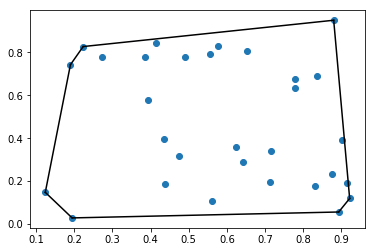

In [35]:
>>> import matplotlib.pyplot as plt
>>> plt.plot(points[:,0], points[:,1], 'o')
>>> for simplex in hull.simplices:
...     plt.plot(points[simplex, 0], points[simplex, 1], 'k-')